In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()   

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Data exploration and visualization

<Figure size 1600x1000 with 0 Axes>

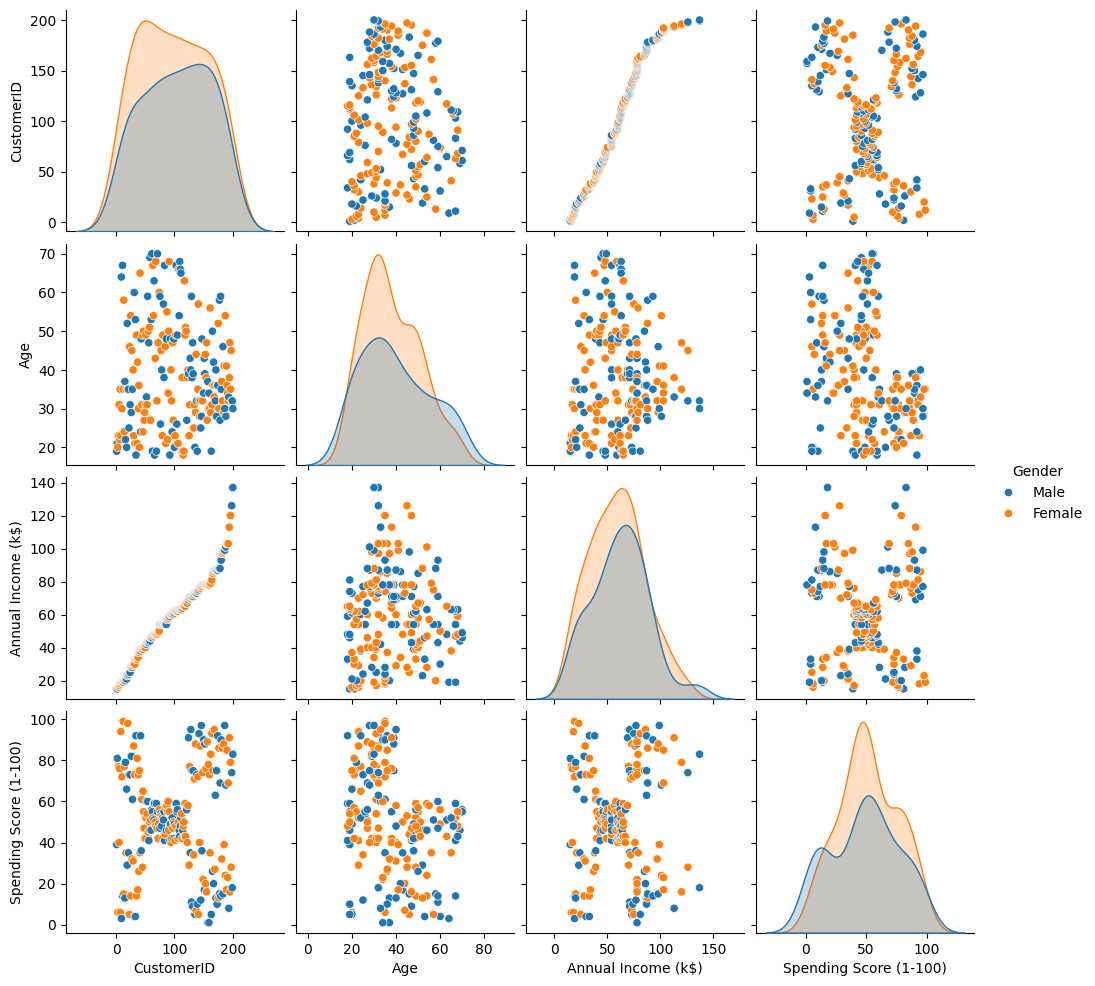

In [12]:
plt.figure(1,figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

Male vs Female

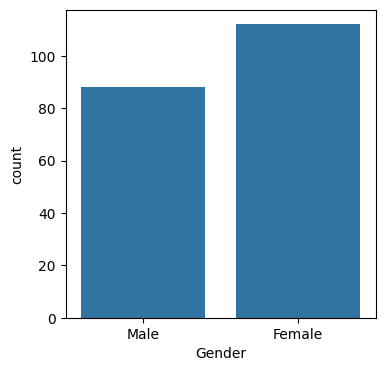

In [14]:
plt.figure(1,figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

Distribution of numerical features (Age, Annual income & Spending score)



C:\Users\keval\AppData\Local\Temp\ipykernel_18796\3835849450.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\keval\AppData\Local\Temp\ipykernel_18796\3835849450.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\keval\AppData\Local\Temp\ipyk

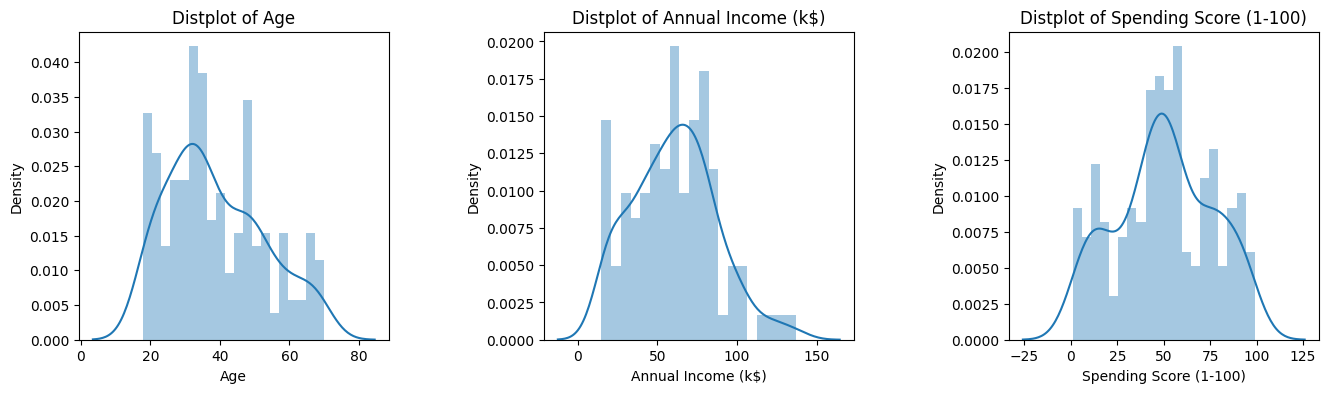

In [19]:
plt.figure(figsize=(16,4))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
    plt.xlabel(x)
    plt.ylabel('Density')
plt.show()

## Clustering using K- means

In [20]:
X = df.iloc[:,[3,4]].values

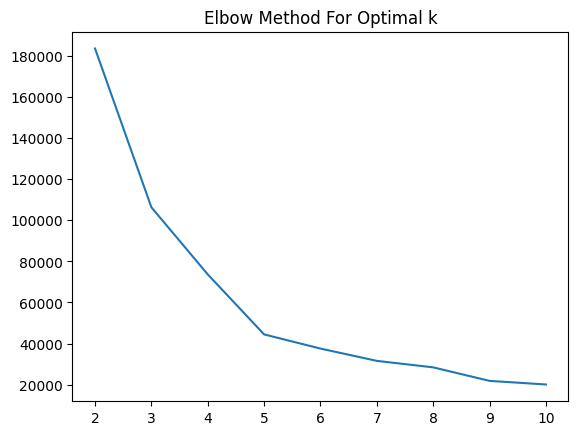

In [32]:
km_inertia, km_scores = [], []

for k in range(2,11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertia.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(x=range(2,11), y=km_inertia)
plt.title('Elbow Method For Optimal k')
plt.show()

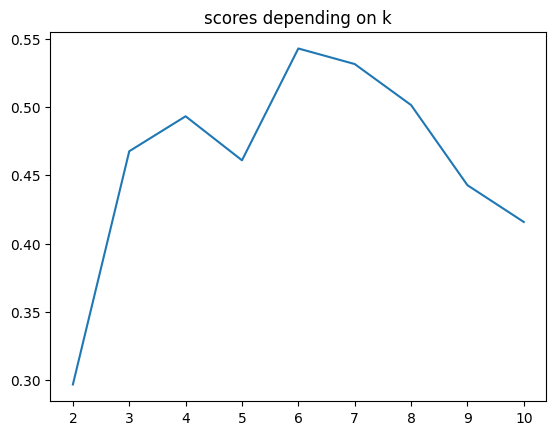

In [30]:
sns.lineplot(x=range(2,11), y=km_scores)
plt.title('scores depending on k')
plt.show()

apply K-means on more than 2 features

In [33]:
X = df.iloc[:, [2,3,4]].values

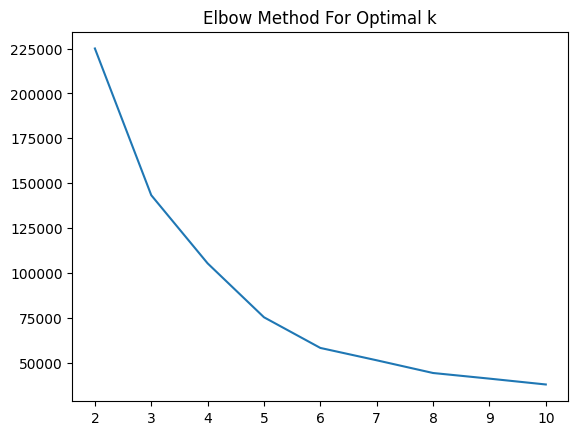

In [36]:
km_inertia, km_scores = [], []
for k in range(2,11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertia.append(km.inertia_)
    km_scores.append(silhouette_score(X,km.labels_))
    
    
sns.lineplot(x=range(2,11), y=km_inertia)
plt.title('Elbow Method For Optimal k')
plt.show()

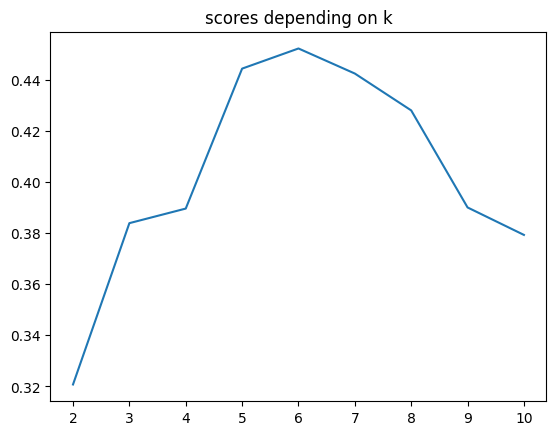

In [39]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [40]:
km = KMeans(n_clusters=5).fit(X)

K-Means visualization on pair of 2 features


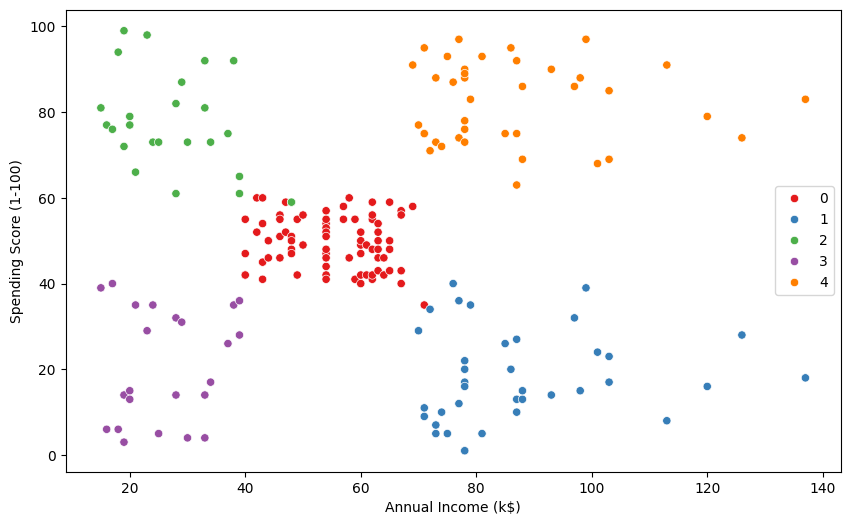

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,1], y=X[:,2], hue=km.labels_, palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

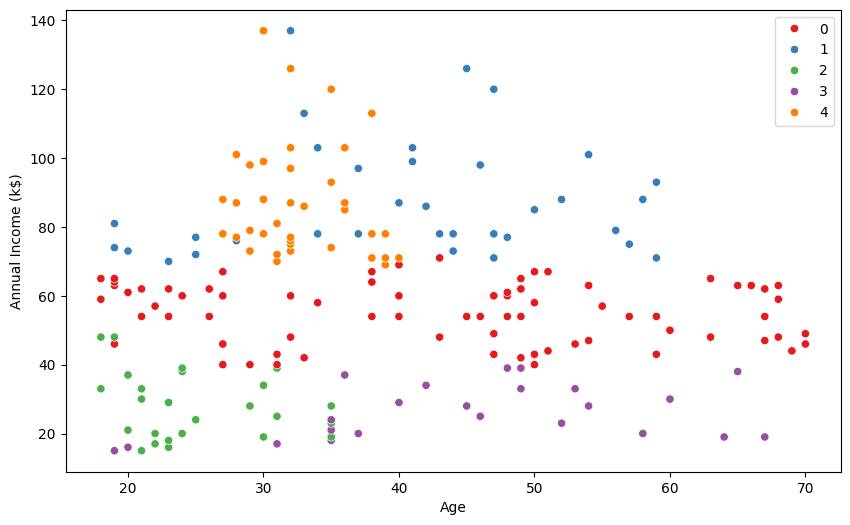

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=km.labels_, palette='Set1')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

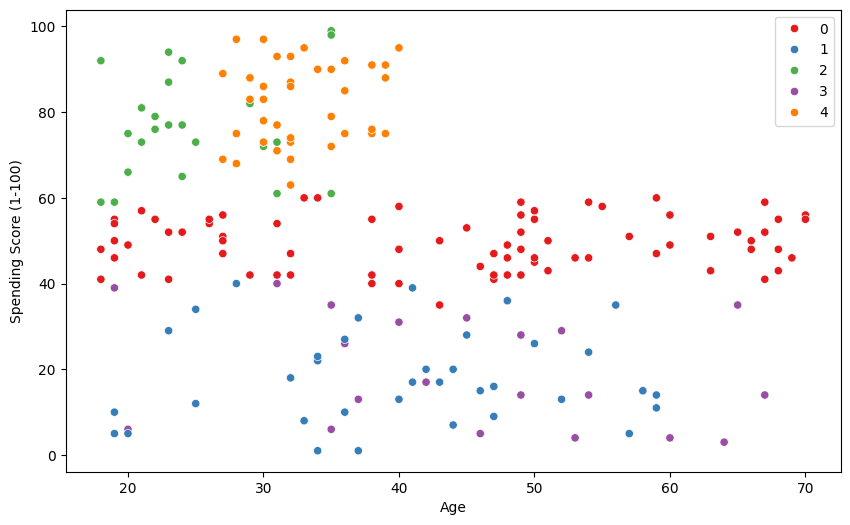

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:, 0], y=X[:, 2], hue=km.labels_, palette='Set1')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Visualization of the clusters in a 3D scatter plot.

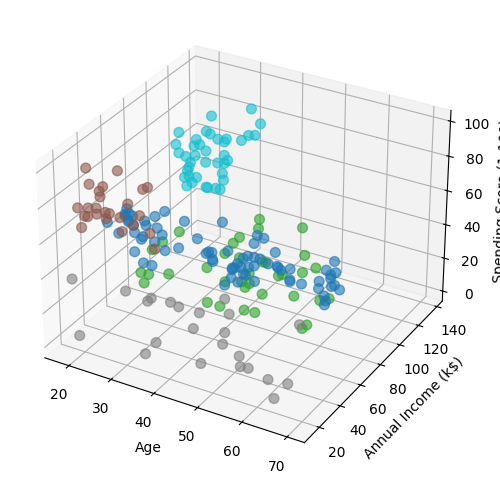

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
ax.scatter(xs, ys, zs, s=50, c=km.labels_, alpha=0.6, cmap='tab10')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

Definition of customers profiles corresponding to each clusters

In [65]:
# Customer Profiles
customer_profiles = pd.DataFrame(X, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
customer_profiles['Cluster'] = km.labels_
customer_profiles

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
...,...,...,...,...
195,35,120,79,4
196,45,126,28,1
197,32,126,74,4
198,32,137,18,1


In [66]:
customer_profiles.Cluster.value_counts()

Cluster
0    76
4    39
1    37
2    25
3    23
Name: count, dtype: int64

In [67]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(customer_profiles[customer_profiles.Cluster== k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  76.000000           76.000000               76.000000
mean   43.934211           55.210526               49.447368
min    18.000000           40.000000               35.000000
max    70.000000           71.000000               60.000000



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  37.000000           37.000000               37.000000
mean   40.324324           87.432432               18.189189
min    19.000000           70.000000                1.000000
max    59.000000          137.000000               40.000000



cluster nb : 2
         Age  Annual Income (k$)  Spending Score (1-100)
count  25.00               25.00                    25.0
mean   24.96               28.04                    77.0
min    18.00               15.00                    59.0
max    35.00               48.00                    99.0



cluster nb : 3
             Age  Annual Income (k$)

In [68]:
customer_profiles[customer_profiles.Cluster == 1].describe().iloc[[0, 1, 3, 7], :-1]


,Age,Annual Income (k$),Spending Score (1-100)
count,37.000000,37.000000,37.000000
mean,40.324324,87.432432,18.189189
min,19.000000,70.000000,1.000000
max,59.000000,137.000000,40.000000


##### Cluster 1. Customers with medium annual income and medium annual spend
##### Cluster 2. Customers with high annual income and high annual spend
##### Cluster 3. Customers with low annual income and low annual spend
##### Cluster 4. Customers with high annual income but low annual spend
##### Cluster 5. Customers low annual income but high annual spend